# Gene Expression Analysis of Rat Testis Across Developmental Stages

## Brad Hansen

### Data from [NCBI GEO](https://www.ncbi.nlm.nih.gov/geo/)

Search terms: *testis*, *rat*, *testes*, *postnatal*,

Only RNA-seq data used (not microarray).

Data used:

GEO study [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348)

> Study GSE108348 includes transcriptomes from three species (*mouse, rat, chicken*), four organs (*testis, brain, liver, kidney*), across five developmental stages (*E 13.5, E 18.5-19, PND 1-2, 8-10 weeks, 24 months*). This project considers the testis data for rats (Wistar) across the development stages. The data is Bulk RNA-seq from a Illumina HiSeq 2000.

GEO study [GSE162152](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162152)

> Study GSE162152 includes gene expression profiling of testis (*also liver and cerebellum*) across five species (*opossum, mouse, rat, rhesus macaque, human*). The authors specifically targeted circRNAs through RNA R treatment, though this analysis only uses the untreated samples. The data is Bulk RNA-seq from Illumina HiSeq 2500. Rat samples taken at 16 weeks of age.

GEO study [GSE125483](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125483)

> Study GSE1235483 includes gene expression profiles from 12 tissues, across 4 species (*cynomolgus macaque, mouse, rat, and dog*). Here we use testis data from 9 week old brown norway rats.

GEO study [GSE85420](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85420)

> Study GSE85420 includes gene expression profiling after exposure to 2,2',4'4' --Tetrabromodiphenyl Ether. This study looks at the testis RNA-seq data for the control group of Wistar rats at PND 120 (\~17 weeks)

GEO study [GSE41637](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE41637)

> Study GSE41637 looks at transciptome differences across mammals. The study reports that samples taken from animals *of breeding age* due to transcriptome stability. Samples analyses (for Rattus norvegicus) using Illumina Genome Analyzer IIx.

GEO study [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)

> Study GSE53960 assesses the *"transcriptomic profiling across 11 organs, 4 ages, and 2 sexes of Fischer 344 rats."* This study uses the testis data from 2, 6, 21, and 104 week old Fischer 344 rats.


# Periods Covered


| Period     | Species    | Strain      | Source                        |
|-------|-----|-----|----|
| Embryonic Day 13.5 (*midstage embryo*)      | Rat        | Wistar                            | [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348)                                                                            |
| Embryonic Day 18.5-19 (*late Embryo*)       | Rat        | Wistar                            | [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348)                                                                            |
| Post Natal Day 1-2 (*neonate*)              | Rat        | Wistar                            | [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348)                                                                            |
| 2 weeks old (*young*)                       | Rat        | Fischer 344                       | [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)                                                                              |
| 6 weeks old (*young*)                       | Rat        | Fischer 344                       | [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)                                                                              |
| 8-10 weeks old (*young adult*), 9 weeks old | Rat        | Wistar, Brown rat                 | [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348), [GSE125483](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125483) |
| 16 weeks old (*adult*)                      | Rat        | Norway Brown (*NCBI Taxon 10116*) | [GSE162152](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162152)                                                                            |
| 17 weeks old (*adult*)                      | Rat        | Wistar                            | [GSE85420](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85420)                                                                              |
| 21 weeks old (*adult*)                      | Rat        | Fischer 344                       | [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)                                                                              |
| 2 years old (*aged adult*)                  | Rat        | Wistar , Fisher 344               | [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348), [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)   |
| *Breeding Age*                              | Rat        | Sprague-Dawley                    | [GSE41637](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE41637)                                                                              |


In [2]:
library(plyranges)
library(tidyverse)
library(dplyr)
library(plyr)
library(DESeq2)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: IRanges

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: GenomicRanges

Loading required package: GenomeInfoDb


Attaching package: ‘plyranges’


The following object is masked from ‘package:IRa

GEO study [GSE108348](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE108348)

Data available: text file of unique read counts 
    * Aligned with HISAT2 (2.0.5)
    * used Ensembl release 94 annotations as a reference and we assembled additional gene models with StringTie 1.3.5.
    * Genome build = rn6
    * uniquely mapped read counts using the Rsubread library in R (featureCounts) version 1.32.4, in R version 3.5.

Strandness of data == Illumina Truseq == use reverse (column 4 in STAR output)

SRR reads:
        SRR6396793
        SRR6396803
        SRR6396794
        SRR6396795
        SRR6396796
        SRR6396797
        SRR6396798
        SRR6396799
        SRR6396800
        SRR6396801
        SRR6396802

In [3]:
# load in files from STAR --quantMode genecounts

countPATH <- "/bigdata/faustmanlab/bch/gse108348_counts/counts"

files <- list.files(path=countPATH, pattern="*.tab", full.names=TRUE)
names(files) <- lapply(strsplit(files, "/|_"), "[",8)
countslist <- lapply(files, read.delim, sep="\t", header=FALSE)
names(countslist)<- names(files)


In [4]:
colnames<- c("gene", "unstranded_counts", "htseq_count_Fstreadalign","htseq_countrev_Sndreadalign")


for (i in seq_along(countslist)){
  colnames(countslist[[i]]) <- colnames}

counts_temp <- lapply(countslist, function(x) {x <- x %>% select(-c(unstranded_counts,htseq_count_Fstreadalign))})
counts_use <- lapply(counts_temp, function(x) {x <- x[-c(1:4),]})



In [5]:

all_counts <- reduce(counts_use, full_join, by = "gene")
colnames(all_counts)<-c("gene", names(counts_use))

rownames(all_counts)<- all_counts$gene
all_counts <- all_counts[,-1]



head(all_counts)


,SRR6396793,SRR6396794,SRR6396795,SRR6396796,SRR6396797,SRR6396798,SRR6396799,SRR6396800,SRR6396801,SRR6396802,SRR6396803
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSRNOG00000066169,3,2,0,1,2,0,8,3,21,20,3
ENSRNOG00000070168,0,0,0,0,0,0,0,0,0,0,0
ENSRNOG00000070901,62,64,83,20,100,123,674,676,1695,2186,2386
ENSRNOG00000018029,1,3,2,1,5,5,10,12,9,36,38
ENSRNOG00000031391,6,7,85,27,37,54,3,2,13,23,8
ENSRNOG00000055342,0,0,0,0,0,0,0,0,0,0,0


In [10]:

# add metadata

metadata <- read.csv("/bigdata/faustmanlab/bch/gse108348_counts/gse108348meta.txt")

colnames(metadata)

metadata<-select(metadata,'Run', 'BioSample', 'Developmental_stage', 'Experiment', 'Sample.Name')

metadata

[1] "Run"                 "Assay.Type"          "AvgSpotLen"         
 [4] "Bases"               "BioProject"          "BioSample"          
 [7] "Bytes"               "Center.Name"         "Consent"            
[10] "DATASTORE.filetype"  "DATASTORE.provider"  "DATASTORE.region"   
[13] "Developmental_stage" "Experiment"          "GEO_Accession..exp."
[16] "Instrument"          "LibraryLayout"       "LibrarySelection"   
[19] "LibrarySource"       "Organism"            "Platform"           
[22] "ReleaseDate"         "Sample.Name"         "source_name"        
[25] "SRA.Study"           "strain"              "BREED"

Run,BioSample,Developmental_stage,Experiment,Sample.Name
<chr>,<chr>,<chr>,<chr>,<chr>
SRR6396793,SAMN08214008,young adult (8-10 weeks),SRX3489972,GSM2895826
SRR6396794,SAMN08214008,young adult (8-10 weeks),SRX3489972,GSM2895826
SRR6396795,SAMN08214100,young adult (8-10 weeks),SRX3489973,GSM2895827
SRR6396796,SAMN08214100,young adult (8-10 weeks),SRX3489973,GSM2895827
SRR6396797,SAMN08214099,aged adult (24 months),SRX3489974,GSM2895828
SRR6396798,SAMN08214098,aged adult (24 months),SRX3489975,GSM2895829
SRR6396799,SAMN08214097,embryonic day 18.5-19,SRX3489976,GSM2895830
SRR6396800,SAMN08214097,embryonic day 18.5-19,SRX3489976,GSM2895830
SRR6396801,SAMN08214096,embryonic day 18.5-19,SRX3489977,GSM2895831


In [14]:
dds <- DESeqDataSetFromMatrix(countData=all_counts,
                                colData = metadata,
                                 design = ~Developmental_stage)



Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



class: DESeqDataSet 
dim: 30560 11 
metadata(1): version
assays(1): counts
rownames(30560): ENSRNOG00000066169 ENSRNOG00000070168 ...
  ENSRNOG00000069230 ENSRNOG00000071103
rowData names(0):
colnames(11): SRR6396793 SRR6396794 ... SRR6396802 SRR6396803
colData names(5): Run BioSample Developmental_stage Experiment
  Sample.Name

In [16]:
dds <- collapseReplicates(dds, groupby= dds$Sample.Name, dds$Run)

dds

class: DESeqDataSet 
dim: 30560 8 
metadata(1): version
assays(1): counts
rownames(30560): ENSRNOG00000066169 ENSRNOG00000070168 ...
  ENSRNOG00000069230 ENSRNOG00000071103
rowData names(0):
colnames(8): GSM2895826 GSM2895827 ... GSM2895832 GSM2895833
colData names(6): Run BioSample ... Sample.Name runsCollapsed

In [17]:
dds <- DESeq(dds)



estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This 

In [20]:
res <- results(dds)
head(results(dds))
summary(res) 

log2 fold change (MLE): Developmental stage young.adult..8.10.weeks. vs aged.adult..24.months. 
Wald test p-value: Developmental stage young.adult..8.10.weeks. vs aged.adult..24.months. 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat    pvalue
                   <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSRNOG00000066169   6.25275      1.5967114  1.887981  0.845724  0.397707
ENSRNOG00000070168   0.00000             NA        NA        NA        NA
ENSRNOG00000070901 744.16711      0.0520183  0.221577  0.234764  0.814392
ENSRNOG00000018029  12.27126     -0.5060473  1.097567 -0.461063  0.644753
ENSRNOG00000031391  40.87872      0.3863351  0.944065  0.409225  0.682375
ENSRNOG00000055342   0.00000             NA        NA        NA        NA
                        padj
                   <numeric>
ENSRNOG00000066169        NA
ENSRNOG00000070168        NA
ENSRNOG00000070901         1
ENSRNOG00000018029        NA
ENSRNOG0000


out of 25062 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 34, 0.14%
LFC < 0 (down)     : 21, 0.084%
outliers [1]       : 0, 0%
low counts [2]     : 7204, 29%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



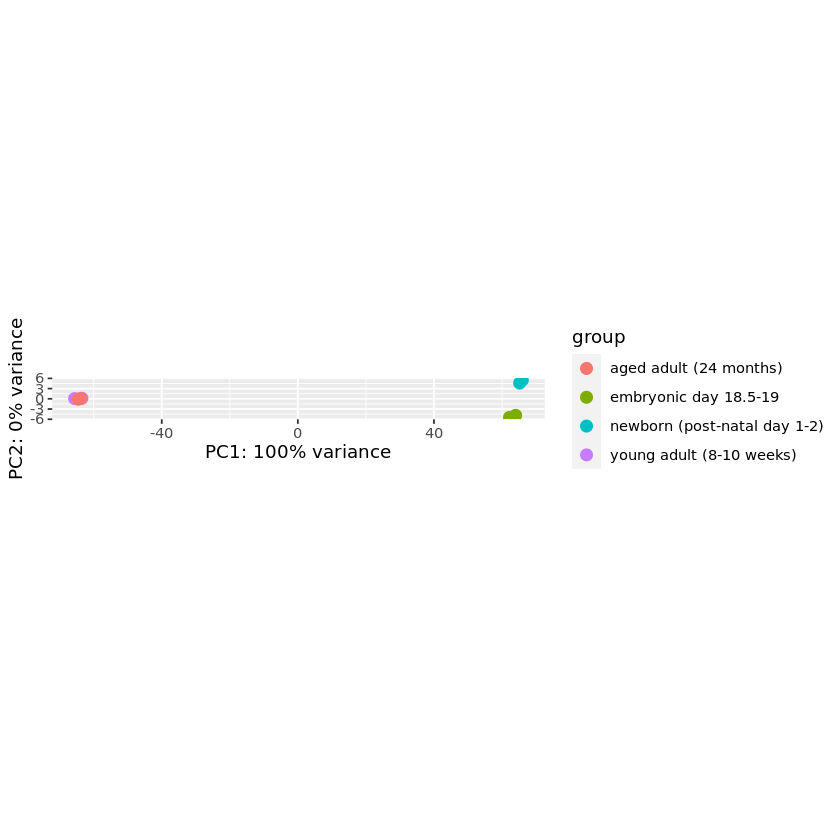

In [26]:
vsdata <- vst(dds, blind=FALSE)
plotPCA(vsdata, intgroup="Developmental_stage") 

GEO study [GSE53960](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53960)

TAR of text files:
    * 	Sequenced reads were trimmed for adaptor sequence, and masked for low-complexity or low-quality sequence, then mapped to rn4 whole genome using TopHat v2.0.4 with default parameters
    * Alignment results were then processed using Cufflinks v2.0.2 for gene and transcript quantification with default parameters. For samples with 2~3 technical replicates, average FPKM (Fragment Per Kilobase per Million mapped reads) values were used.
    * Genome_build: rn4


SRR reads:
        SRR1170487
        SRR1170488
        SRR1170489
        SRR1170490
        SRR1170491
        SRR1170492
        SRR1170493
        SRR1170494
        SRR1170495
        SRR1170496
        SRR1170497
        SRR1170498
        SRR1170499
        SRR1170500
        SRR1170501
        SRR1170502
        SRR1170503
        SRR1170504
        SRR1170505
        SRR1170506
        SRR1170507
        SRR1170508
        SRR1170509
        SRR1170510
        SRR1170511
        SRR1170512
        SRR1170513
        SRR1170514
        SRR1170515
        SRR1170516
        SRR1170517
        SRR1170518

GEO study [GSE162152](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162152)

txt files specific to circRNAs -- need raw data from SRA

SRA files:
        SRR13142136
        SRR13142137
        SRR13142138

GEO study [GSE85420](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85420) 

txt files with processed data:
    * mapped to the reference rat genome (rn5) using TopHat 2 aligner
    * Aligned reads were used for assembly of novel transcripts and differential expression of novel and reference transcripts with Cuffdiff 2.1.1.
    * Supplementary_files_format_and_content: XLSX file showing Log2(FPKM) for control and exposed condition and Log2 of their FPKM ratio for each transcript, as well as transcript coordinates and gene names.

SRA files:
        SRR4017429
        SRR4017448
        SRR4017447
        SRR4017446
        SRR4017445
        SRR4017431
        SRR4017432
        SRR4017433
        SRR4017434
        SRR4017435
        SRR4017436
        SRR4017437
        SRR4017438
        SRR4017439
        SRR4017440
        SRR4017441
        SRR4017442
        SRR4017443
        SRR4017444

[GSE41637](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE41637)

Supplementary files include mapped reads:
    * Mapped to rn4

SRA files:
        SRR594427 (strain F344/cr1)
        SRR594436 (strain BN/SsNHsd)
        SRR594445 (strain Sprague-Dawley)


